# Laboratorium 3
### Exploratory analysis of Titanic Sur


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
titanic = pd.read_csv("TitanicSurvival.csv")
#pd.set_option('precision', 2)
titanic = pd.DataFrame(titanic)

In [3]:
titanic

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st
...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",no,female,14.5000,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5000,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0000,3rd


In [3]:
titanic.columns = ["Name", "Survived", "Sex", "Age", "Class"]

In [4]:
titanic["Age"].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

Average age is $30 \pm 14$ years old. The youngest passenger was less than $2$ months, whereas the oldest one was $80$ years old.
Below we can see the histogram of age. 

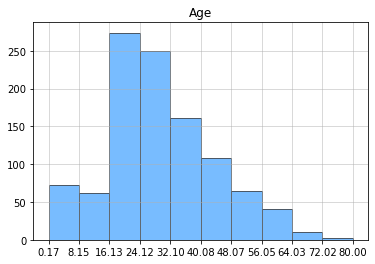

In [6]:
n, bins, edges = plt.hist(titanic.Age,
                              bins=10,
                              ec="k",
                              color = "dodgerblue",
                              alpha=0.6)
plt.xticks(bins)
plt.grid(axis = "both", alpha = 0.6)
plt.title("Age")
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

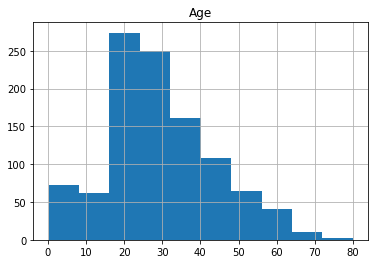

In [7]:
titanic.hist()

Statistics of the passengers that survived.

In [8]:
t_survived = titanic.query("Survived == 'yes'")
t_survived

,Name,Survived,Sex,Age,Class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
5,"Anderson, Mr. Harry",yes,male,48.0000,1st
6,"Andrews, Miss. Kornelia Theodos",yes,female,63.0000,1st
8,"Appleton, Mrs. Edward Dale (Cha",yes,female,53.0000,1st
...,...,...,...,...,...
1261,"Turkula, Mrs. (Hedwig)",yes,female,63.0000,3rd
1277,"Vartanian, Mr. David",yes,male,22.0000,3rd
1286,"Whabee, Mrs. George Joseph (Sha",yes,female,38.0000,3rd
1290,"Wilkes, Mrs. James (Ellen Needs",yes,female,47.0000,3rd


In [9]:
t_survived.describe()

,Age
count,427.000000
mean,28.918228
std,15.061481
min,0.166700
25%,20.000000
50%,28.000000
75%,38.000000
max,80.000000


Average age of the survived is $29 \pm 15$ years old. 

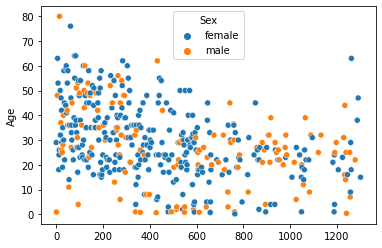

In [11]:
sns.scatterplot(x = t_survived.index, y = t_survived.Age, 
                hue = t_survived["Sex"])
plt.show()

In [21]:
female = len(t_survived.query("Sex=='female'"))
male = len(t_survived.query("Sex=='male'"))

print(f"The number of women that survived: {female} ({female/len(t_survived)*100:.2f}%)")
print(f"The number of men that survived: {male} ({male/len(t_survived)*100:.2f}%)")

The number of women that survived: 339 (67.80%)
The number of men that survived: 161 (32.20%)


In [22]:
class1 = len(t_survived.query("Class=='1st'"))
class2 = len(t_survived.query("Class=='2nd'"))
class3 = len(t_survived.query("Class=='3rd'"))

In [33]:
print(f'Number of passengers from the 1st class that survived: {class1} ({class1/len(t_survived)*100:.2f}%)')
print(f'Number of passengers from the 2nd class that survived: {class2} ({class2/len(t_survived)*100:.2f}%)')
print(f'Number of passengers from the 3rd class that survived: {class3} ({class3/len(t_survived)*100:.2f}%)')


Number of passengers from the 1st class that survived: 200 (40.00%)
Number of passengers from the 2nd class that survived: 119 (23.80%)
Number of passengers from the 3rd class that survived: 181 (36.20%)


In [34]:
women = titanic.query("Sex == 'female'")

In [35]:
women_1st = women.query("Class == '1st'")
women_1st

,Name,Survived,Sex,Age,Class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0,1st
6,"Andrews, Miss. Kornelia Theodos",yes,female,63.0,1st
8,"Appleton, Mrs. Edward Dale (Cha",yes,female,53.0,1st
...,...,...,...,...,...
311,"Wick, Mrs. George Dennick (Mary",yes,female,45.0,1st
314,"Widener, Mrs. George Dunton (El",yes,female,50.0,1st
315,"Willard, Miss. Constance",yes,female,21.0,1st
319,"Wilson, Miss. Helen Alice",yes,female,31.0,1st


In [36]:
women_1st.sort_values(by=["Age"])

,Name,Survived,Sex,Age,Class
2,"Allison, Miss. Helen Loraine",no,female,2.0,1st
55,"Carter, Miss. Lucile Polk",yes,female,14.0,1st
193,"Madill, Miss. Georgette Alexand",yes,female,15.0,1st
195,"Maioni, Miss. Roberta",yes,female,16.0,1st
159,"Hippach, Miss. Jean Gertrude",yes,female,16.0,1st
...,...,...,...,...,...
176,"Kenyon, Mrs. Frederick R (Mario",yes,female,NaN,1st
204,"Meyer, Mrs. Edgar Joseph (Leila",yes,female,NaN,1st
277,"Spencer, Mrs. William Augustus",yes,female,NaN,1st
293,"Taylor, Mrs. Elmer Zebley (Juli",yes,female,NaN,1st


In [37]:
women_1st.describe()

,Age
count,133.000000
mean,37.037594
std,14.272460
min,2.000000
25%,24.000000
50%,36.000000
75%,48.000000
max,76.000000


The youngest woman that was in the 1st class was $2$ yo and the oldest was $76$ yo.  

In [40]:
women_1st.query("Survived == 'yes'")

,Name,Survived,Sex,Age,Class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0,1st
6,"Andrews, Miss. Kornelia Theodos",yes,female,63.0,1st
8,"Appleton, Mrs. Edward Dale (Cha",yes,female,53.0,1st
11,"Astor, Mrs. John Jacob (Madelei",yes,female,18.0,1st
12,"Aubart, Mme. Leontine Pauline",yes,female,24.0,1st
...,...,...,...,...,...
311,"Wick, Mrs. George Dennick (Mary",yes,female,45.0,1st
314,"Widener, Mrs. George Dunton (El",yes,female,50.0,1st
315,"Willard, Miss. Constance",yes,female,21.0,1st
319,"Wilson, Miss. Helen Alice",yes,female,31.0,1st


In [56]:
women_1st[women_1st.Survived=='yes']

,Name,Survived,Sex,Age,Class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0,1st
6,"Andrews, Miss. Kornelia Theodos",yes,female,63.0,1st
8,"Appleton, Mrs. Edward Dale (Cha",yes,female,53.0,1st
11,"Astor, Mrs. John Jacob (Madelei",yes,female,18.0,1st
12,"Aubart, Mme. Leontine Pauline",yes,female,24.0,1st
...,...,...,...,...,...
311,"Wick, Mrs. George Dennick (Mary",yes,female,45.0,1st
314,"Widener, Mrs. George Dunton (El",yes,female,50.0,1st
315,"Willard, Miss. Constance",yes,female,21.0,1st
319,"Wilson, Miss. Helen Alice",yes,female,31.0,1st


In [60]:
women_1st_survived = women_1st[women_1st.Survived=='yes'].shape[0]
women_1st_all = women_1st.shape[0]

In [62]:
print(f'Number of women from the 1st class that survived: {women_1st_survived} ({women_1st_survived/women_1st_all*100:.2f})%')

Number of women from the 1st class that survived: 139 (96.53)%
